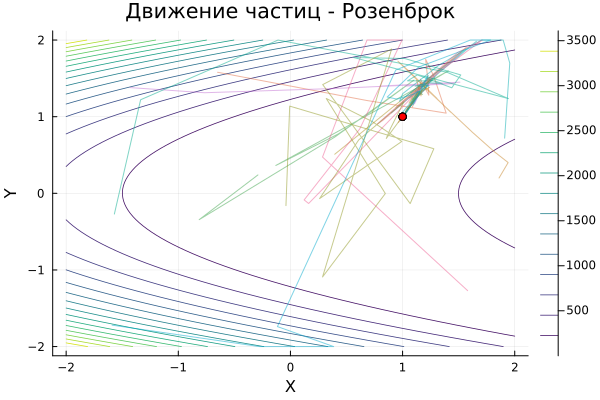


Результат: Минимум 0.00000 найден в точке (1.00000, 1.00000)


In [21]:
using Random, Statistics, Printf, Plots

# Включаем поддержку графиков
gr()

# Функция Розенброка
function rosenbrock(x, y)
    return (1 - x)^2 + 100 * (y - x^2)^2
end

# Инициализация частиц
function initialize_particles(num_particles, bounds)
    particles = [[rand(bounds[1]:0.01:bounds[2]), rand(bounds[1]:0.01:bounds[2])] for _ in 1:num_particles]
    velocities = [[rand(bounds[1]:0.01:bounds[2]), rand(bounds[1]:0.01:bounds[2])] for _ in 1:num_particles]
    return particles, velocities
end

# Алгоритм роя частиц с визуализацией
function particle_swarm_optimization(num_particles, bounds, w, c1, c2, max_iters, objective_function)
    particles, velocities = initialize_particles(num_particles, bounds)
    personal_best = deepcopy(particles)
    personal_best_values = [objective_function(p[1], p[2]) for p in particles]

    global_best_index = argmin(personal_best_values)
    global_best = personal_best[global_best_index]
    global_best_value = personal_best_values[global_best_index]

    history = Vector{Vector{Vector{Float64}}}()  # История движения частиц
    push!(history, deepcopy(particles))  # Сохраняем начальное положение

    for iter in 1:max_iters
        for i in 1:num_particles
            velocities[i] .= w .* velocities[i] .+
                             c1 .* rand() .* (personal_best[i] .- particles[i]) .+
                             c2 .* rand() .* (global_best .- particles[i])

            particles[i] .= particles[i] .+ velocities[i]
            particles[i] .= clamp.(particles[i], bounds[1], bounds[2])

            value = objective_function(particles[i][1], particles[i][2])
            if value < personal_best_values[i]
                personal_best[i] = copy(particles[i])
                personal_best_values[i] = value
            end

            if value < global_best_value
                global_best = copy(particles[i])
                global_best_value = value
            end
        end

        push!(history, deepcopy(particles))  # Сохраняем текущее положение
    end

    return global_best, global_best_value, history
end

# Функция для отрисовки траектории частиц с линиями уровня
function plot_particles(history, bounds, name, objective_function)
    x_range = range(bounds[1], bounds[2], length=100)
    y_range = range(bounds[1], bounds[2], length=100)
    Z = [objective_function(x, y) for x in x_range, y in y_range]

    p = contour(x_range, y_range, Z, linewidth=0.8, title="Движение частиц - $name",
                xlabel="X", ylabel="Y", color=:viridis)

    num_particles = length(history[1])

    for i in 1:num_particles
        x_vals = [history[t][i][1] for t in 1:length(history)]
        y_vals = [history[t][i][2] for t in 1:length(history)]
        plot!(p, x_vals, y_vals, lw=1, legend=false, alpha=0.5)
    end

    scatter!(p, [history[end][i][1] for i in 1:num_particles],
                [history[end][i][2] for i in 1:num_particles],
                color=:red, label="Финальные точки", marker=:circle)

    display(p)
end

# Запуск теста с графиком
best_point, best_value, history = particle_swarm_optimization(10, (-2.0, 2.0), 0.5, 1.5, 1.5, 100, rosenbrock)
@printf("\nРезультат: Минимум %.5f найден в точке (%.5f, %.5f)\n",
        best_value, best_point[1], best_point[2])

# Визуализация траекторий частиц с линиями уровня
plot_particles(history, (-2.0, 2.0), "Розенброк", rosenbrock)